In [1]:
using LightGraphs, MetaGraphs
using Distributions
using Plots
using HCubature
using Combinatorics

In [ ]:
mg = initialize_regular_grid_graph_CT()
get_prop(mg,2,:n_delay)

In [137]:
mg = MetaGraph()
add_vertex!(mg,Dict(:x=>1))
add_vertex!(mg,Dict(:x=>2))
add_edge!(mg,1,2,:weight,1.0)

true

In [11]:
d = Gamma(4,0.5)

Gamma{Float64}(α=4.0, θ=0.5)

In [16]:
x = range(0,stop=10,length=1000)
y = [pdf(d,f) for f in x]
plot(x,y,title="Gamma(4,0.5)",leg=false)
savefig("Gamma")
#scatter!([1.5],[pdf(d,1.5)])

In [ ]:
for e in edges(mg)
    print(get_prop(mg,Edge(1,2),:weight))
end

In [ ]:
edges(mg)

In [ ]:
const GraphPath = Vector{Edge}
traversal_time(path::GraphPath) = sum([get_prop(path,e,:weight) for e in path])

In [ ]:
path = GraphPath()
path = Vector([e for e in edges(mg)])

In [ ]:
typeof(path)

In [ ]:
traversal_time(path)

In [ ]:
[get_prop(path,e,:weight) for e in path]

In [ ]:
mg = MetaGraph()
for k in range(50)
    add_vertex!(mg,Dict(:x=>k))
end
add_edge!(mg,1,2,:weight,1.0)
add_edge!(mg,5,6,:weight,1.0)

In [ ]:
for e in edges(mg)
    print(get_prop(mg,Edge(1,2),:weight))
end

In [ ]:
factorial(5)

In [ ]:
1^3*5

In [148]:
function get_collision_probability(n1,t1,n2,t2,nn,t_delay,lambda)
        
    function f(x)
        y = x[1]
        t = x[2]
        #density = hcubature(d1,[t2-t1+y],[1000],rtol = 0.5)[1] * lambda^(n1+n2) *  (t)^(n1-1) * (y+t)^(n2-1) * exp(-lambda*(y+2*t)) / (factorial(n1-1)*factorial(n2-1))
        #density = hcubature(d1,[t2-t1+y],[1000],rtol = 0.5)[1] * (lambda^(n1) * (t)^(n1-1)  * exp(-lambda*(y+2*t)) / factorial(n1-1))*(lambda^(n2) * (y+t)^(n2-1)/factorial(n2-1))
        density = (1-cdf(Gamma(nn,lambda),abs(t2-t1+y))) * pdf(Gamma(n1,lambda), t) * pdf(Gamma(n2,lambda),t-y)
        return density
    end
    
    function g(x)
        y = x[1]
        t = x[2]
        #density = hcubature(d1,[t2-t1+y],[1000],rtol = 0.5)[1] * lambda^(n1+n2) *  (t)^(n1-1) * (y+t)^(n2-1) * exp(-lambda*(y+2*t)) / (factorial(n1-1)*factorial(n2-1))
        #density = hcubature(d1,[t2-t1+y],[1000],rtol = 0.5)[1] * (lambda^(n1) * (t)^(n1-1)  * exp(-lambda*(y+2*t)) / factorial(n1-1))*(lambda^(n2) * (y+t)^(n2-1)/factorial(n2-1))
        density = (1-cdf(Gamma(nn,lambda),abs(t2-t1+y))) * pdf(Gamma(n1,lambda), t+y) * pdf(Gamma(n2,lambda),t)
        return density
    end
    
    a = [-1000.0;0.0]
    b = [0.0,1000.0]
    m = [0.0;0.0]
    n = [1000.0,1000.0]
    C1,err1 = hcubature(f,a,b)
    C2,err2 = hcubature(g,m,n)
    C = C1 + C2
    err = err1 + err2
    
    return C, err

end

get_collision_probability (generic function with 1 method)

In [149]:
n1 = 2
t1 = 1
n2 = 3
t2 = 2
nn = 5
t_delay = 0
lambda = 1

1

In [150]:
get_collision_probability(n2,t2,n1,t1,nn,t_delay,lambda)

(0.9101047231574282, 1.353667710724611e-8)

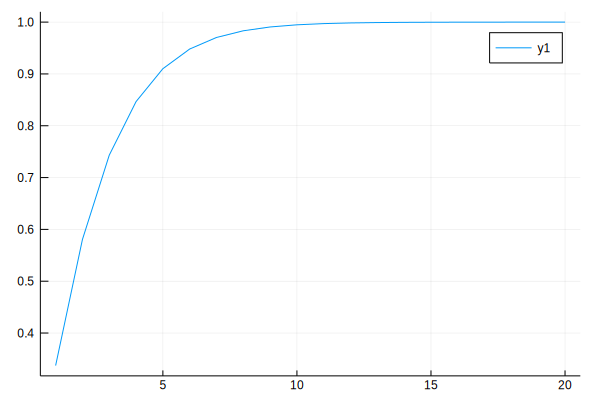

In [151]:
nns = 1:20
cp = [get_collision_probability(n1,t1,n2,t2,nnx,t_delay,lambda)[1] for nnx in nns]
plot(nns,cp)

In [ ]:
function d1(z)
    return lambda^nn * z[1]^(nn-1) * exp(-lambda*z[1]) / factorial(nn-1)
end

function f(x)
    y = x[1]
    t = x[2]
    #density = hcubature(d1,[t2-t1+y],[1000],rtol = 0.5)[1] * lambda^(n1+n2) *  (t)^(n1-1) * (y+t)^(n2-1) * exp(-lambda*(y+2*t)) / (factorial(n1-1)*factorial(n2-1))
    #density = hcubature(d1,[t2-t1+y],[1000],rtol = 0.5)[1] * (lambda^(n1) * (t)^(n1-1)  * exp(-lambda*(y+2*t)) / factorial(n1-1))*(lambda^(n2) * (y+t)^(n2-1)/factorial(n2-1))
    density = (1-cdf(Gamma(nn,lambda),abs(t2-t1+y))) * pdf(Gamma(n1,lambda), t) * pdf(Gamma(n2,lambda),t+y)
    return density
end

In [ ]:
yx = 15

hcubature(d1,[t2-t1+yx],[100000],rtol = 0.1)[1]

In [ ]:
f([100,100])

In [ ]:
a = [0;0]
b = [100;-100]
hcubature(f,a,b,rtol = 1.0)

In [ ]:
1/0.4

In [ ]:
y = 16
t=3

hcubature(d1,[t2-t1+y],[1000],rtol = 0.5)[1] * lambda^(n1+n2) *  (t)^(n1-1) * (y+t)^(n2-1) * exp(-lambda*(y+2*t)) / (factorial(n1-1)*factorial(n2-1))

In [8]:
my_tuple = (1,2)

(1, 2)

In [11]:
my_dict::Dict{Tuple,Float64} = Dict{Tuple,Float64}()

ErrorException: syntax: type declarations on global variables are not yet supported

In [122]:
md = Dict()
md[1] = 2
md[13] = 5
md[34] = 12

12

In [123]:
for k in keys(md)
    print(k,"\n")
end

13
34
1


In [154]:
l = collect(combinations([1,2,3,4,5],[6,7,8]))

MethodError: MethodError: no method matching combinations(::Array{Int64,1}, ::Array{Int64,1})
Closest candidates are:
  combinations(::Any) at /home/peltzer/.julia/packages/Combinatorics/Utkwu/src/combinations.jl:62
  combinations(::Any, !Matched::Integer) at /home/peltzer/.julia/packages/Combinatorics/Utkwu/src/combinations.jl:48

In [130]:
(a,b) = l[1]

2-element Array{Int64,1}:
 1
 2

In [132]:
b

2

In [140]:
collect(edges(mg))[1]

Edge 1 => 2

In [3]:
e = Edge(2,1)

Edge 2 => 1

In [4]:
typeof(e)

LightGraphs.SimpleGraphs.SimpleEdge{Int64}

In [10]:
f = Vector{Edge}()

0-element Array{LightGraphs.SimpleGraphs.SimpleEdge,1}

In [6]:
typeof(f)

DataType

In [10]:
@elapsed(10+13+15/0.001)

0.003892421

In [26]:
a = @time(1)

  0.000000 seconds (3 allocations: 144 bytes)


1

In [35]:
A = ones(5,5)

5×5 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0

In [36]:
A[1,2]

1.0

In [17]:
filename = "solutions/CRCBS_Written_test_1.txt"
f = open(filename)

IOStream(<file solutions/CRCBS_Written_test_1.txt>)

In [18]:
for line in eachline(f)
    println(line)
    println(split(line, ";"))
    println(split(split(line, ";")[1]," "))
end
close(f)

63 74; 74 85; 
SubString{String}["63 74", " 74 85", " "]
SubString{String}["63", "74"]
9 8; 8 19; 19 18; 18 17; 
SubString{String}["9 8", " 8 19", " 19 18", " 18 17", " "]
SubString{String}["9", "8"]
73 62; 62 61; 61 50; 50 39; 39 38; 38 37; 37 26; 
SubString{String}["73 62", " 62 61", " 61 50", " 50 39", " 39 38", " 38 37", " 37 26", " "]
SubString{String}["73", "62"]


In [20]:
parse(Int64,"200")+1

201

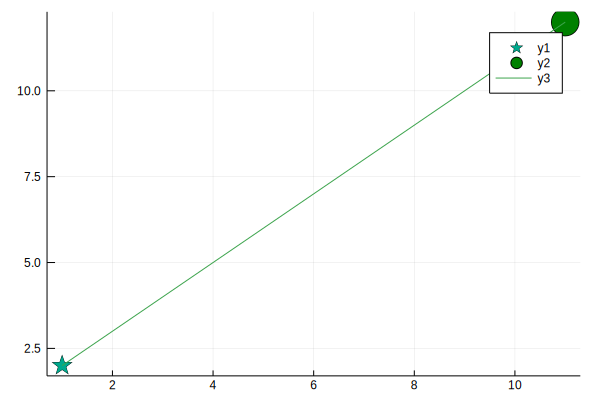

In [6]:
using Plots
myplot = plot()
scatter!([1],[2],marker=:star5,markersize=10,markercolor=9)
scatter!([11],[12],marker=:circle,markersize=15,markercolor=:green)
plot!([1,11],[2,12])

In [48]:
string(6," ",1," ",2)

"6 1 2"

In [49]:
using Plots
x = -pi:0.01:pi
y = cos.(x)
plot(x,y)
savefig("MyPlot.pdf")

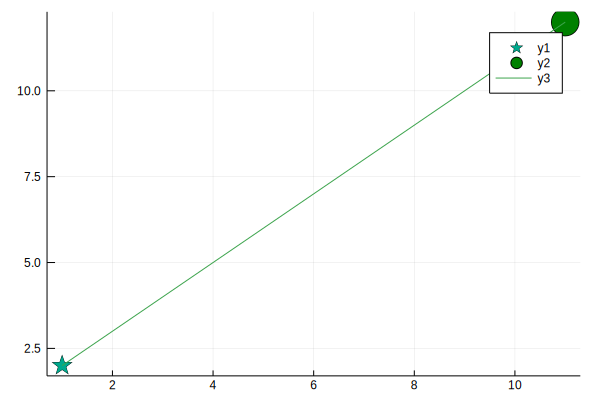

In [8]:
function returnplot()
    myplot = plot()
    scatter!([1],[2],marker=:star5,markersize=10,markercolor=9)
    scatter!([11],[12],marker=:circle,markersize=15,markercolor=:green)
    plot!([1,11],[2,12])
    return myplot
end

myplot = returnplot()
myplot2 = returnplot()

In [9]:
string(1,"er")

"1er"

In [11]:
size(zeros(1,2,3))

(1, 2, 3)

In [12]:
for k=1:10
    for j=1:10
        continue
    end
    println(k)
end

1
2
3
4
5
6
7
8
9
10


In [9]:
using Plots

function initial_plot(;point=0)
    path1x = [1,1,2,3,3]
    path1y = [1,2,2,2,3]
    pp = plot(path1x,path1y,color=1,leg=false,title="Edge Conflict")
    scatter!([path1x[1]],[path1y[1]], marker=:diamond,markersize=10,color=1)
    scatter!([path1x[end]],[path1y[end]], marker=:circle,markersize=10,color=1)
    
    if point != 0
        scatter!([path1x[point]],[path1y[point]], marker=:square,markersize=5,color=1)
    end

    path2x = [4,4,3,2,2]
    path2y = [1,2,2,2,3]
    plot!(path2x,path2y,color=2)
    scatter!([path2x[1]],[path2y[1]], marker=:diamond,markersize=10,color=2)
    scatter!([path2x[end]],[path2y[end]], marker=:circle,markersize=10,color=2)
    
    if point != 0
        scatter!([path2x[point]],[path2y[point]], marker=:square,markersize=5,color=2)
    end
    
    return pp
end

plot1 = initial_plot()
savefig("n1")

for k in 1:5
    plotk = initial_plot(point=k)
    savefig(string("n",k))
end



In [6]:
using Distributions
function count_node_conflicts(n1,n2,t1mt2,nn,lambda;num_particles=50000)
    """Monte Carlo simulation"""
    EA1 = rand(Gamma(n1,lambda),num_particles)
    EA2 = rand(Gamma(n2,lambda),num_particles)
    ed1 = rand(Gamma(nn,lambda),num_particles)
    ed2 = rand(Gamma(nn,lambda),num_particles)

    r1_arrivals = t1mt2 .+ EA1
    r1_departures = r1_arrivals + ed1
    r2_arrivals = 0.0 .+ EA2
    r2_departures = r2_arrivals + ed2

    num_conflicts =length(findall(((r2_departures-r1_arrivals).>0) .& ((r1_departures-r2_arrivals).>0)   ))

    return num_conflicts/num_particles
end

count_node_conflicts (generic function with 1 method)

In [7]:
n1=5;
n2=6;
nn=8;
lambda=0.2;
tdiffs = range(-10,10,step=0.15);

ydiffs = [count_node_conflicts(n1,n2,t,nn,lambda) for t in tdiffs];

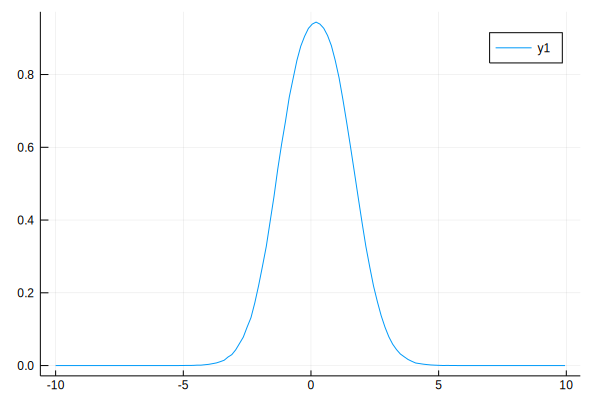

In [8]:
using Plots
plot(tdiffs, ydiffs)

In [3]:
using Distributions
using HCubature

function grid_collision_probability_node(n1,t1,n2,t2,nn,lambda)

    function h(x)
        y = x[1]
        t = x[2]
        density = (1-cdf(Gamma(nn,lambda),abs(t1-t2-y))) * pdf(Gamma(n2,lambda), t) * pdf(Gamma(n1,lambda),t-y)
        return density
    end

    dt = 0.05

    a = [-100.0;-100.0]
    b = [100.0,100.0]

    gridestimate = @timed(estimate_integral(a,b,dt,h))
    Cgrid=gridestimate[1]
    dtgrid = gridestimate[2]

    res1 = @timed(hcubature(h,a,b,maxevals=10^8))
    C,err = res1[1]
    dt = res1[2] #time spent performing integration

    return C, Cgrid, dt,dtgrid
end

function estimate_integral(a,b,dt,h)
    xs = range(a[1],stop=b[1],step=dt)
    ys = range(a[2],stop=b[2],step=dt)
    dS1dS2 = dt^2

    int=0

    for x in xs
        for y in ys
            int += h([x,y])
        end
    end

    int *= dS1dS2

    return int
end


estimate_integral (generic function with 1 method)

In [8]:
n1 = 2
t1 = 1
n2 = 3
t2 = 2
nn = 5
t_delay = 0
lambda = 1

1

In [2]:
using CRCBS

┌ Info: Recompiling stale cache file /home/peltzer/.julia/compiled/v1.0/CRCBS/26Ksw.ji for CRCBS [edef75b8-3ac4-11e9-0392-bf149c536ee3]
└ @ Base loading.jl:1190
┌ Warning: Package CRCBS does not have JLD in its dependencies:
│ - If you have CRCBS checked out for development and have
│   added JLD as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with CRCBS
└ Loading JLD into CRCBS from project dependency, future warnings for CRCBS are suppressed.
┌ Warning: Replacing docs for `CRCBS.get_dist_matrix :: Tuple{LightGraphs.AbstractGraph}` in module `CRCBS`
└ @ Base.Docs docs/Docs.jl:223
┌ Warning: Replacing docs for `CRCBS.pad_matrix :: Union{Tuple{T}, Tuple{Array{T,2},Tuple{Int64,Int64},T}} where T` in module `CRCBS`
└ @ Base.Docs docs/Docs.jl:223


In [7]:
grid_collision_probability_node(n1,t1,n2,t2,nn,lambda)

(0.00016932678639297426, 0.002205406122799985, 0.173207651, 2.957177998)

In [6]:
n1= 2 
t1= 33.103863082710596 
n2= 13 
t2= 9.982151565372344
nn= 2
lambda= 0.8684050517224706

0.8684050517224706

In [10]:
typeof(-2.0)

Float64

In [11]:
round(-2.0)

-2.0

In [12]:
round(-2.001)

-2.0